In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mtick

In [3]:
sns.set(rc={'figure.figsize':(15,8)})

In [34]:
df = pd.read_csv("train.csv")

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


 I will  start with datacleaning if needed

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

In [6]:
df.duplicated().sum() #data has no duplicates 


0

In [7]:
df.isna().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
df["Outlet_Identifier"].nunique()


10

**Fill Missing Values of Outlet_Size based On sales OF the Outlet**


In [9]:
sales_per_outlet = df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()
labels = ['Small','Medium','High']
bins = [0,1912+2298/2,2298+2681/2,float('inf')]
predicted_sizes=pd.cut(sales_per_outlet,labels=labels,bins=bins)
sizes_map = predicted_sizes.to_dict()
df['Outlet_Size']=df['Outlet_Size'].fillna(df["Outlet_Identifier"].map(sizes_map))
df["Outlet_Size"].isna().sum()

0

In [10]:
df["Outlet_Size"].isna().sum()

0

In [11]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

**Unify Names**

In [12]:
def adjust_fat_content(i) :
    if i in ['low fat', 'LF'] : 
        return 'Low Fat'
    
    elif i in ["reg"] :
        return "Regular"
    
    else :
        return i
    

df["Item_Fat_Content"] = df["Item_Fat_Content"].apply(adjust_fat_content)
    
df["Item_Fat_Content"].unique() 

array(['Low Fat', 'Regular'], dtype=object)

**Fill Missing VALUES Of Item_weight column**

In [13]:
item_weight_mean =  df.groupby("Item_Type")["Item_Weight"].mean()
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Type"].map(item_weight_mean))


In [14]:
df["Item_Weight"].isna().sum()

0

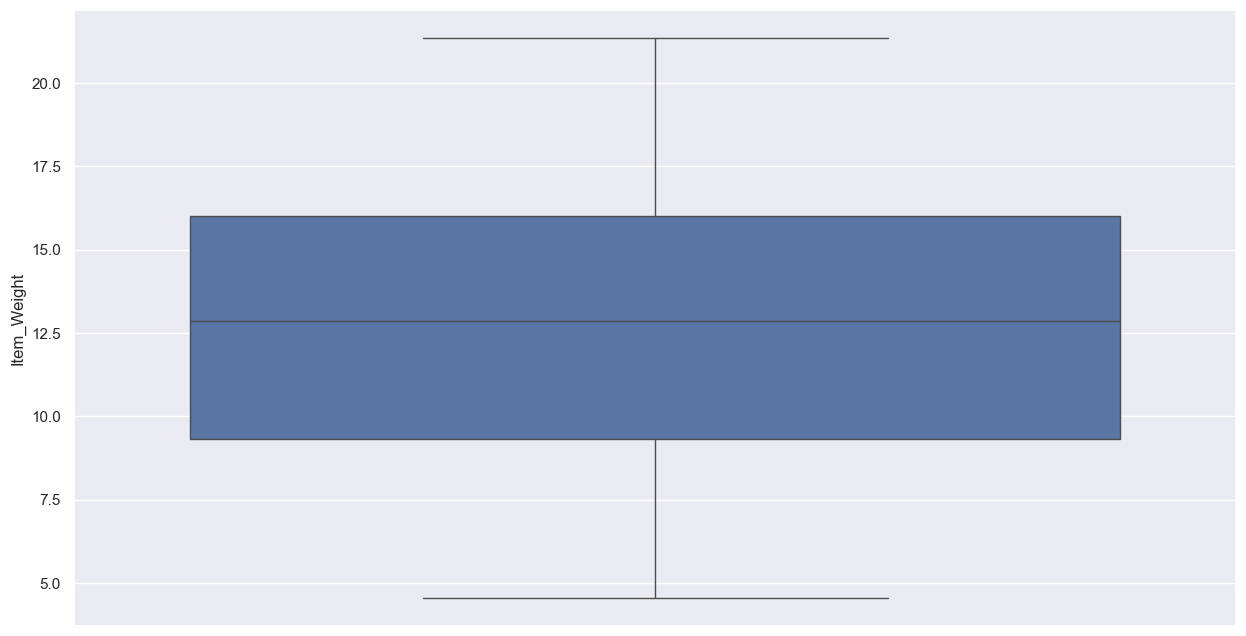

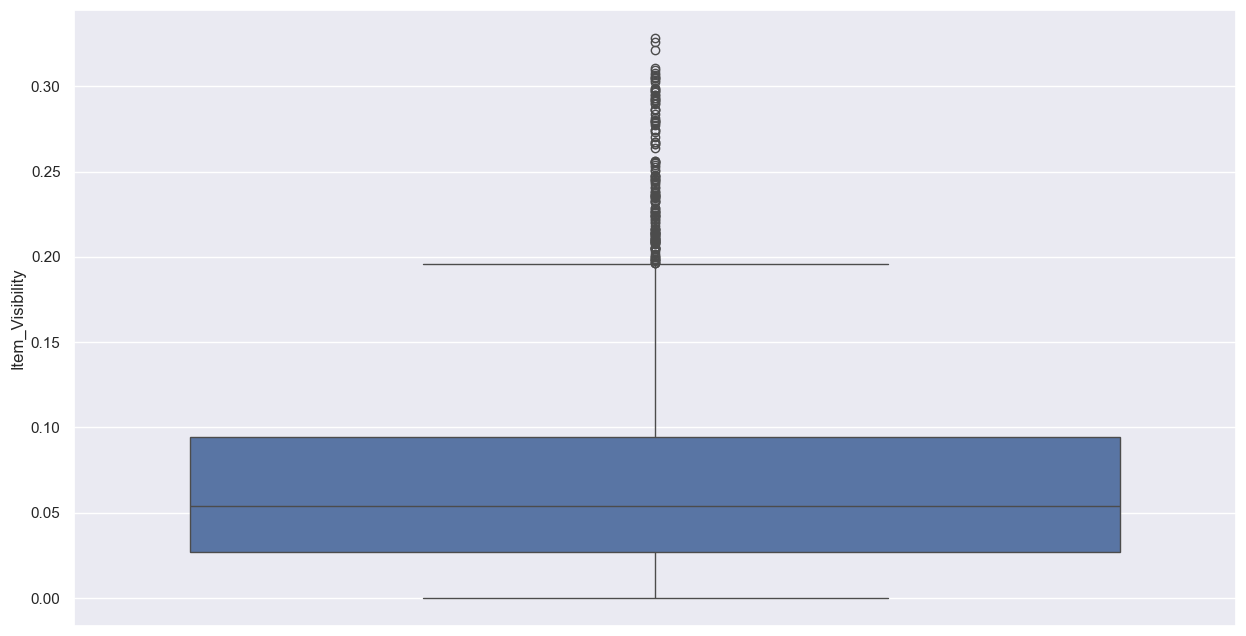

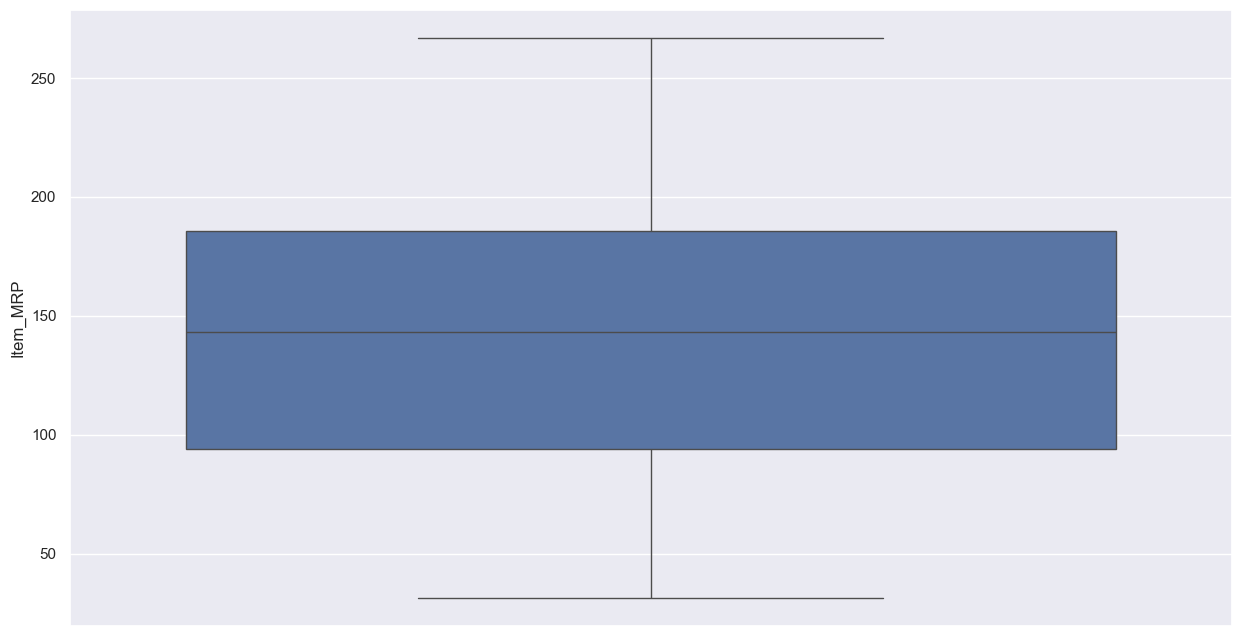

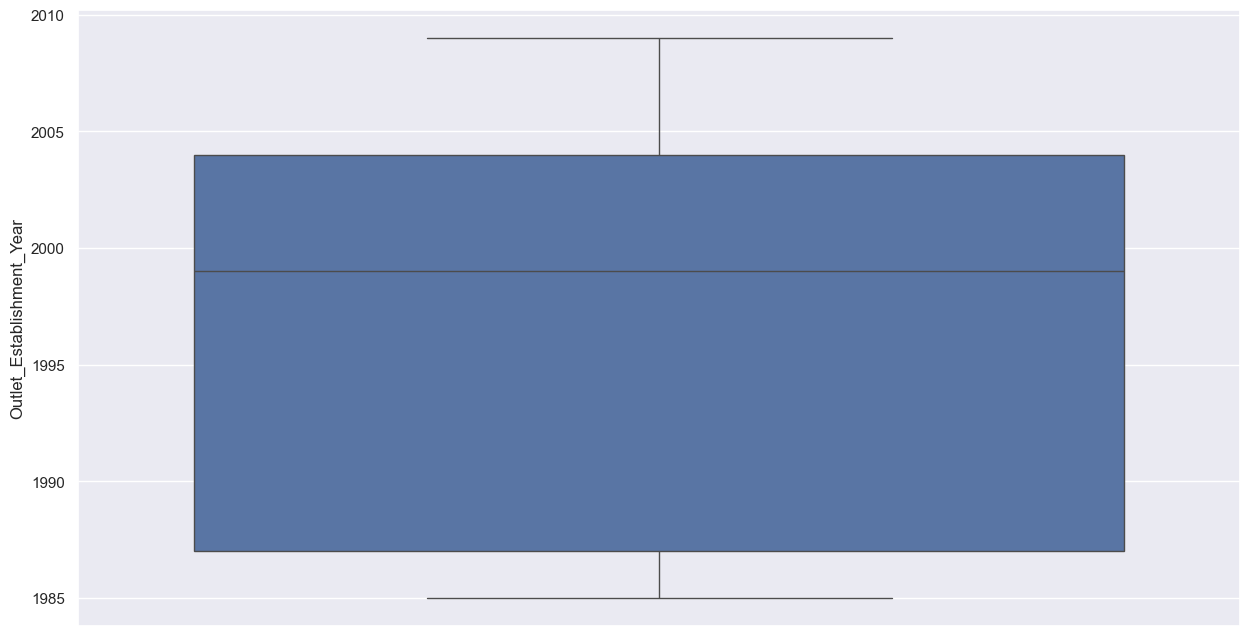

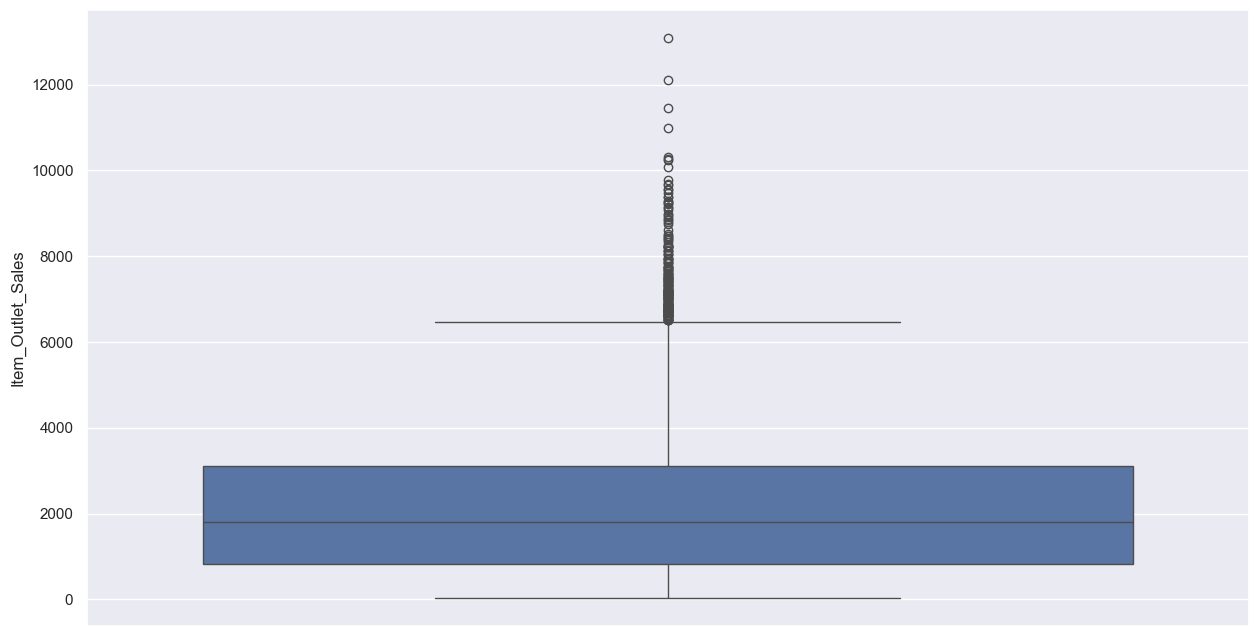

In [15]:
for i in df.select_dtypes("number").columns : 
    sns.boxplot(data=df,y=i)
    plt.show()

In [29]:
for col in df.select_dtypes("number").columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers_df = df.loc[(df[col] > upper)  | (df[col] < lower)]
    print("outlier column is :",col)
    print(outliers_df)
    print("**"*10)
    
   
    

outlier column is : Item_Weight
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
********************
outlier column is : Item_Visibility
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
49             FDS02    13.426069          Regular         0.255395   
83             NCL18    13.384736          Low Fat         0.293418   
108            DRE60    11.847460          Low Fat         0.278974   
174            FDI32    17.700000          Low Fat         0.291865   
334            FDC41    12.867061          Low Fat         0.204700   
...              ...          ...              ...              ...   
8292           FDF56    13.224769          Regular         0.209163   
8345           FDY28    12.867061          Regular         0.266397   
8371           DRA59     8.270000    

In [17]:
outliers_list = []

for col in df.select_dtypes("number").columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

   
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]

   
    outliers_list.extend(outliers.tolist())
    
   
    num_outliers = outliers.count()
    total = df[col].count()
    perc_outliers = num_outliers / total
    
    print(f"{col}: {perc_outliers:.2%} outliers")
    

    if perc_outliers < 0.05:
        print(f" {col} has <5% outliers.")
    else:
        print(f"{col} has >=5% outliers.")

print(f"\nTotal outliers collected: {len(outliers_list)}")

Item_Weight: 0.00% outliers
 Item_Weight has <5% outliers.
Item_Visibility: 1.69% outliers
 Item_Visibility has <5% outliers.
Item_MRP: 0.00% outliers
 Item_MRP has <5% outliers.
Outlet_Establishment_Year: 0.00% outliers
 Outlet_Establishment_Year has <5% outliers.
Item_Outlet_Sales: 2.18% outliers
 Item_Outlet_Sales has <5% outliers.

Total outliers collected: 330


**My insight there is no need to remove outliers most of numbers appears natural**

Data cleaned totally now we can start the EDA process

**most selling items**


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3724\1570103129.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


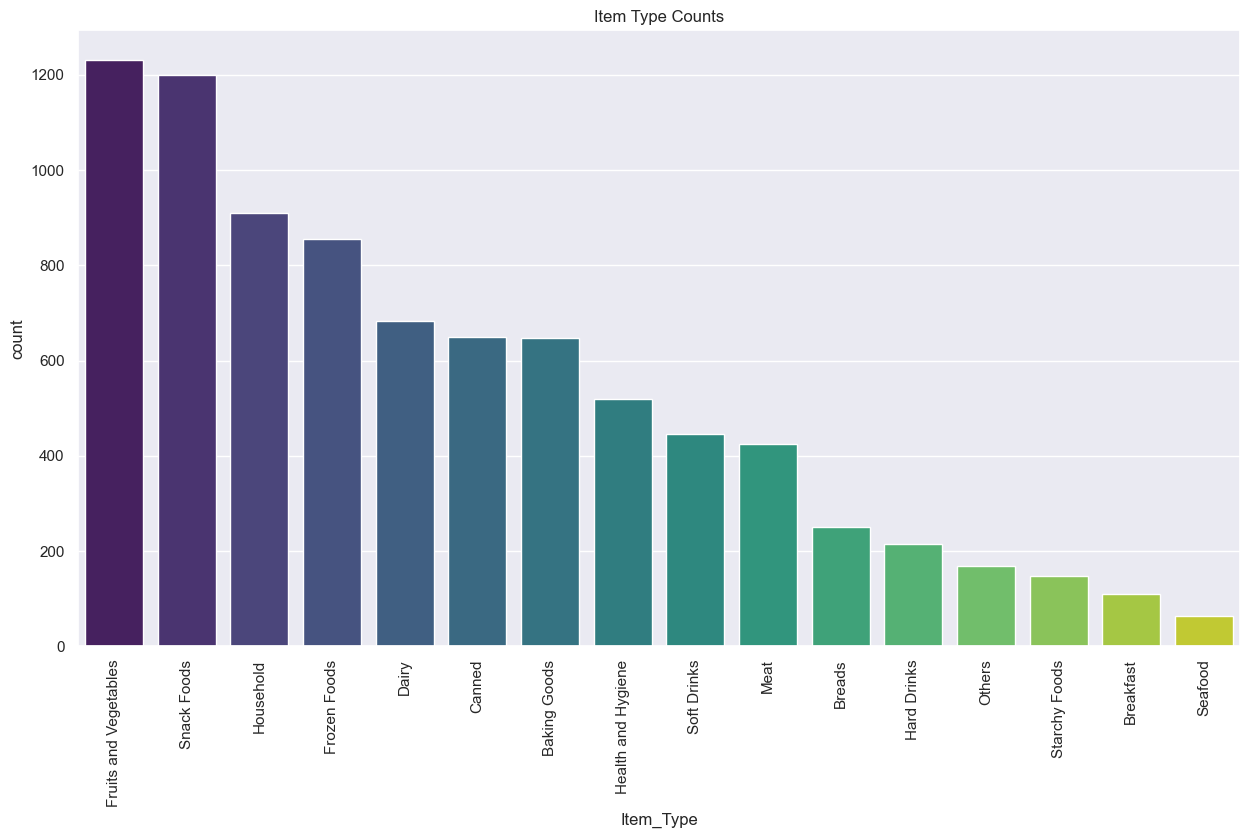

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3724\1570103129.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


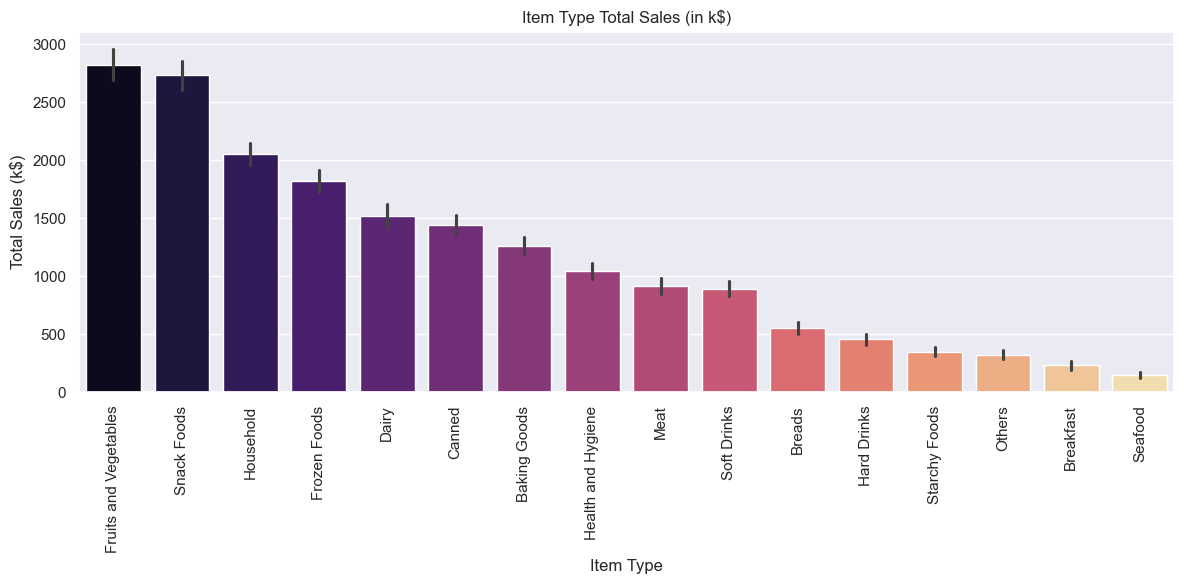

In [18]:
order = df["Item_Type"].value_counts().index


sns.countplot(
    data=df,
    x="Item_Type",
    order=order,
    palette="viridis"
)
plt.xticks(rotation=90)
plt.title("Item Type Counts")
plt.show()


order = (
    df.groupby("Item_Type")["Item_Outlet_Sales"]
    .sum()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x="Item_Type",
    y=df["Item_Outlet_Sales"] / 1000,  
    estimator=sum,
    order=order,
    palette="magma"
)

plt.xticks(rotation=90)
plt.title("Item Type Total Sales (in k$)")
plt.ylabel("Total Sales (k$)")
plt.xlabel("Item Type")
plt.tight_layout()
plt.show()

most profitable items in terms of weight thinking about cost of shipping kpi

In [19]:
# compute sums
agg = df.groupby("Item_Type")[["Item_Outlet_Sales", "Item_Weight"]].sum().astype(int)

# compute ratio
agg["Sales_per_Weight"] = agg["Item_Outlet_Sales"] / agg["Item_Weight"]

# sort by the ratio
agg_sorted = agg.sort_values(by="Sales_per_Weight", ascending=False)

# optional: round for readability
agg_sorted["Sales_per_Weight"] = agg_sorted["Sales_per_Weight"].round(2)

print(agg_sorted)
["Item_Outlet_Sales"]

                       Item_Outlet_Sales  Item_Weight  Sales_per_Weight
Item_Type                                                              
Breads                            553237         2848            194.25
Hard Drinks                       457793         2439            187.70
Seafood                           148868          803            185.39
Canned                           1444151         7986            180.84
Snack Foods                      2732786        15585            175.35
Starchy Foods                     351401         2026            173.45
Fruits and Vegetables            2820059        16292            173.09
Soft Drinks                       892897         5272            169.37
Household                        2055493        12180            168.76
Meat                              917565         5447            168.45
Dairy                            1522594         9156            166.29
Frozen Foods                     1825734        11014           

['Item_Outlet_Sales']

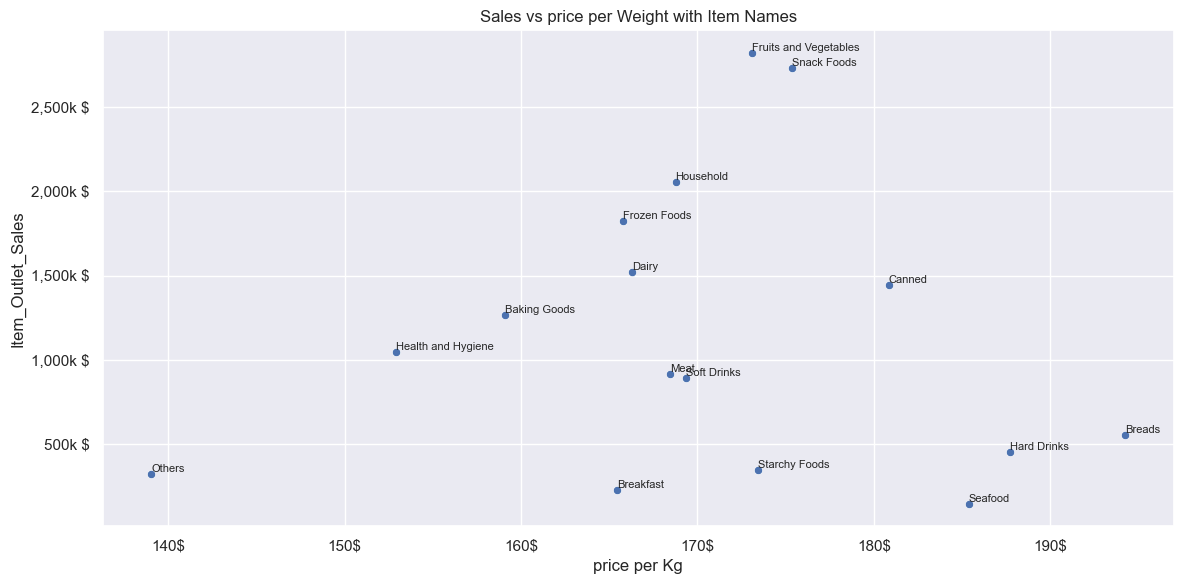

In [20]:


# scatterplot
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=agg, x="Sales_per_Weight", y="Item_Outlet_Sales")

# format y-axis in k $
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{int(x/1_000):,}k $')
)
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{int(x/1):,}$')
)

plt.ylabel("Item_Outlet_Sales")
plt.xlabel("price per Kg")
plt.title("Sales vs price per Weight with Item Names")

# add item names on the x-axis (as labels above points)
for i, row in agg.reset_index().iterrows():
    ax.text(
        row["Sales_per_Weight"], 
        row["Item_Outlet_Sales"], 
        row["Item_Type"], 
        fontsize=8, 
        ha='left', 
        va='bottom'
    )

plt.tight_layout()
plt.show()



**Most selling outlets**

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3724\1589365272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df , x="Outlet_Identifier",palette="viridis",y="Item_Outlet_Sales",estimator=np.sum)


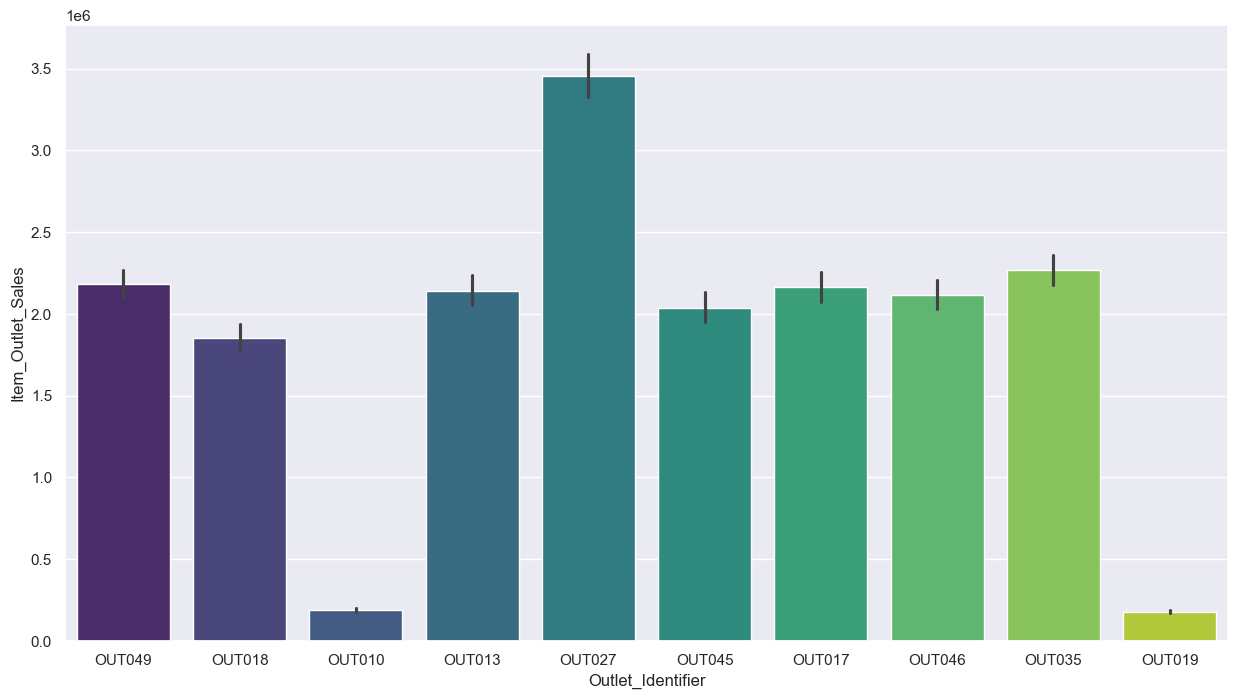

In [21]:
print(df.groupby('Outlet_Identifier').size().sort_values(ascending=False))
sns.barplot(data=df , x="Outlet_Identifier",palette="viridis",y="Item_Outlet_Sales",estimator=np.sum)
plt.show()

total sales compared to number of purchases for each outlet type

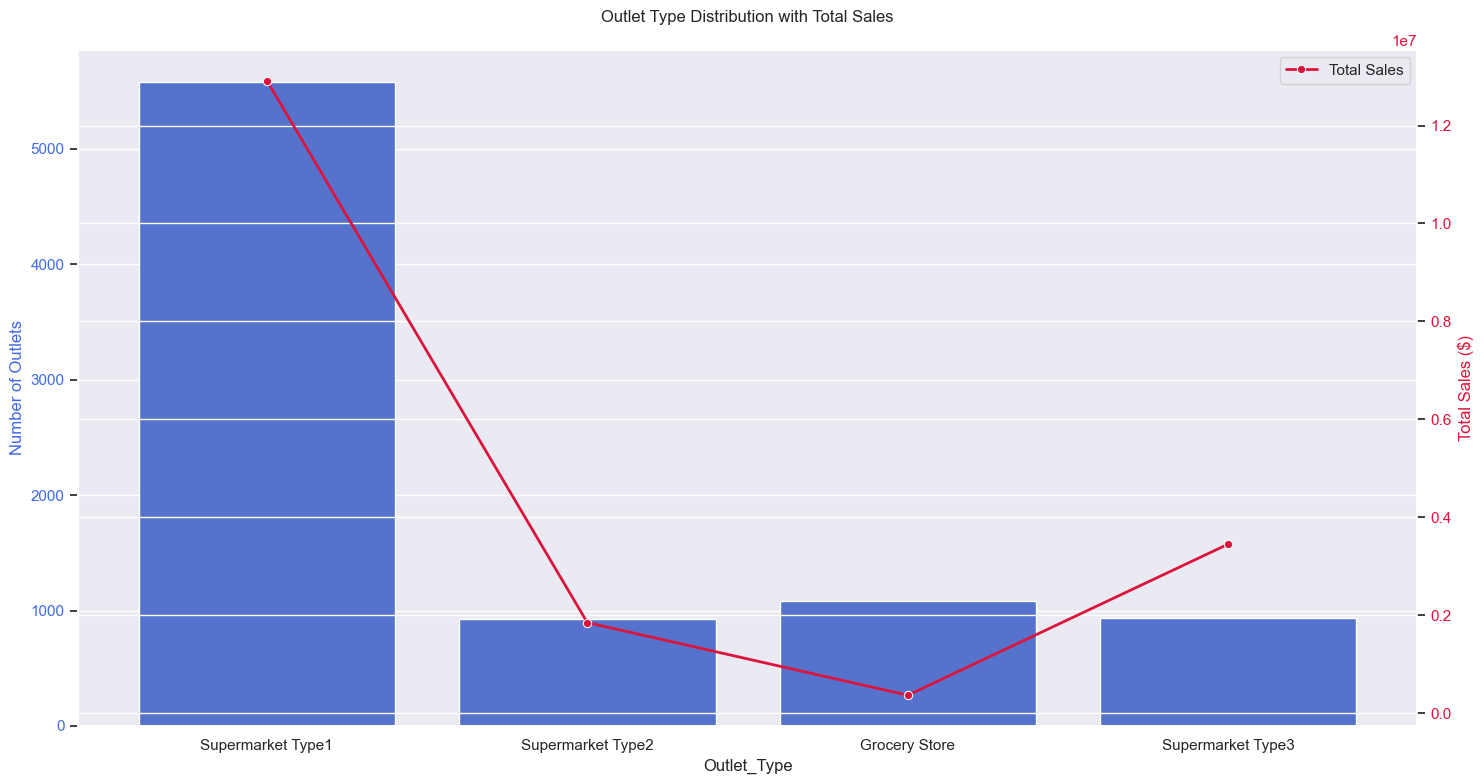

In [22]:

# Count of outlets
ax = sns.countplot(data=df, x='Outlet_Type', color='royalblue')

# Sales information (using sum)
sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

# Create second y-axis
ax2 = ax.twinx()
sns.lineplot(x=sales.index, y=sales.values, 
             ax=ax2, color='crimson', marker='o', 
             linewidth=2, label='Total Sales')

# Customize appearance
ax.set_ylabel('Number of Outlets', color='royalblue')
ax.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel('Total Sales ($)', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title('Outlet Type Distribution with Total Sales', pad=20)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**insights about fat content**

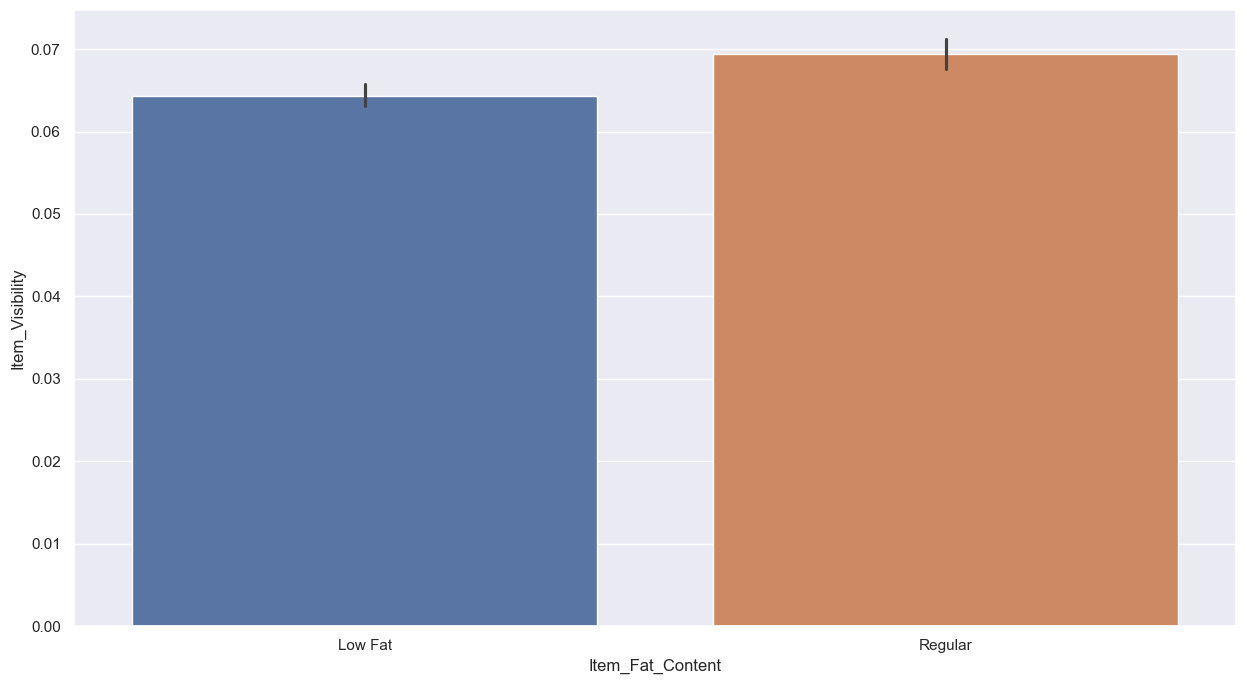

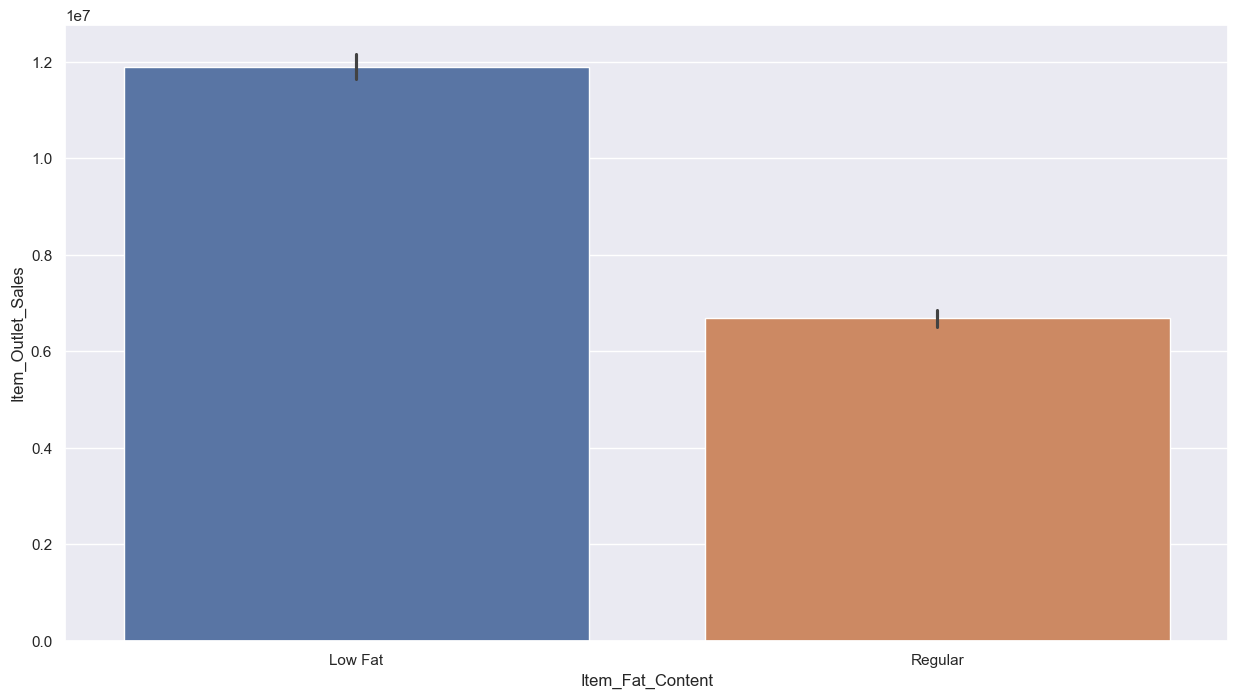

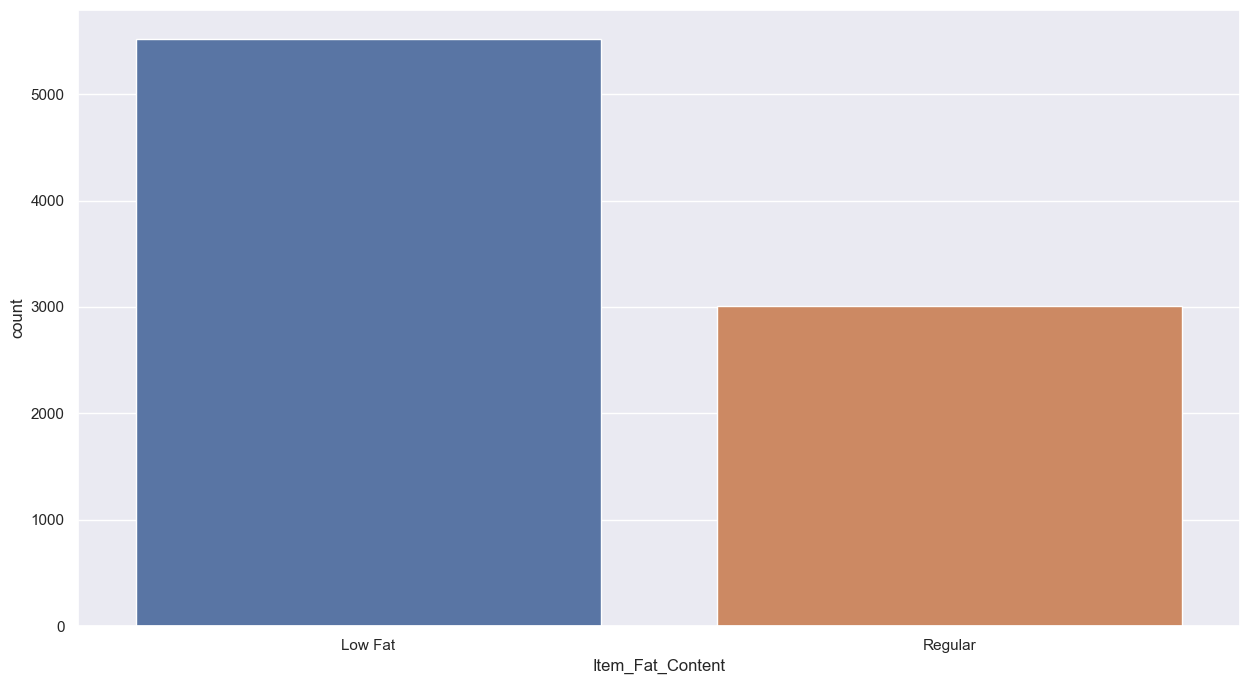

In [23]:
sns.barplot(data=df , y="Item_Visibility",x="Item_Fat_Content",hue="Item_Fat_Content")
plt.show()
sns.barplot(data=df , y="Item_Outlet_Sales",x="Item_Fat_Content",hue="Item_Fat_Content",estimator=sum)
plt.show()
sns.countplot(data=df,x="Item_Fat_Content",hue="Item_Fat_Content")
plt.show()


Distribution of MRP by Item Type

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3724\2145286394.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


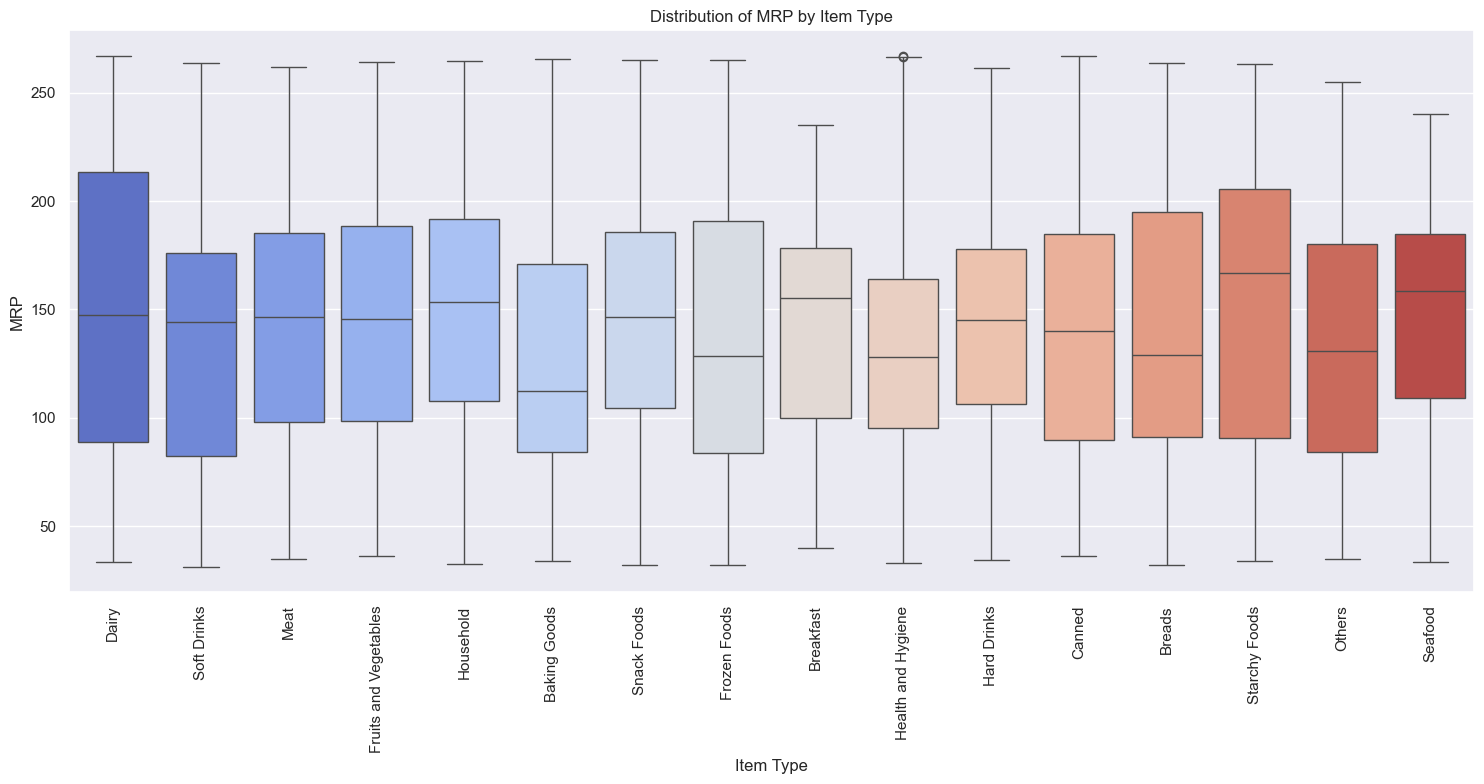

In [24]:
sns.boxplot(
    data=df,
    x='Item_Type',
    y='Item_MRP',
    palette='coolwarm'
)

plt.xticks(rotation=90)
plt.title("Distribution of MRP by Item Type")
plt.ylabel("MRP")
plt.xlabel("Item Type")
plt.tight_layout()
plt.show()

most selling products

In [25]:
# Get top 10 Item_Identifier by count
top_products = df['Item_Identifier'].value_counts().head(10).index

# Filter rows where Item_Identifier is in top 10
df.loc[df["Item_Identifier"].isin(top_products), ["Item_Identifier",'Item_Type']].drop_duplicates()


,Item_Identifier,Item_Type
231,FDG33,Seafood
256,FDW13,Canned
283,DRE49,Soft Drinks
294,FDV60,Baking Goods
342,NCY18,Household
594,NCJ30,Household
652,FDD38,Canned
979,FDF52,Frozen Foods
1670,NCQ06,Household
3380,FDX04,Frozen Foods


**Thank you!**